## <font color='red'>*CM5_Project1*</font>
### Student Name: <font color='darkblue'>Jon-Mikel Pearson</font>
### Date: 11/07/2021
### Description: Generative Adversarial Network

First attempt at using MNIST and abstract drawings to generate GAN images

### First step - creating custom images

Installing libraries that may not be part of standard ML systems

### Second step - practicing with built-in data from keras

Using MNIST with a basic model
Display images

### Third step - practicing with built-in data from keras

Using MNIST with an updated model
Display more defined images

### Fourth step - practicing with custom abstract art images

Build custom dataset using abstract art images
Using custom dataset with a basic model
Display images


### Fifth step - practicing with built-in data from keras

Using custom dataset with an updated model
Display more defined images


### Challenges and need to dos:

        1. Abstract art images are too fuzzy - how do I make more defined?
        2. How do I convert back to color?

In [1]:
# ensures datasets are available
import sys
!{sys.executable} -m pip install tensorflow_datasets opencv-python

You should consider upgrading via the '/Users/jon-mikelpearson/anaconda3/bin/python -m pip install --upgrade pip' command.


In [2]:
# importing required libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [3]:
tf.random.set_seed(42)

# download built-in MNIST data from keras
[X_train, y_train], [X_test, y_test] = tf.keras.datasets.mnist.load_data()
X_train = X_train / 255
X_test = X_test / 255

In [4]:
# converts data from UTF-8 to floats
X_train = tf.cast(X_train, tf.float32)

In [5]:
X_train

<tf.Tensor: shape=(60000, 28, 28), dtype=float32, numpy=
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0

In [6]:
X_train[0].shape

TensorShape([28, 28])

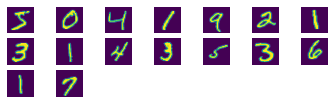

In [7]:
for i in range(16):
    # define subplot
    plt.subplot(7, 7, 1 + i)
    # turn off axis
    plt.axis('off')
    # plot raw pixel data
    plt.imshow(X_train[i])
plt.show()

In [8]:
# NOTE: not 100% sure what this is doing except determing input shape for later
codings_size = 30

# create the generator
generator = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[codings_size]),
    keras.layers.Dense(150, activation="selu"),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])

In [9]:
generator.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               3100      
_________________________________________________________________
dense_1 (Dense)              (None, 150)               15150     
_________________________________________________________________
dense_2 (Dense)              (None, 784)               118384    
_________________________________________________________________
reshape (Reshape)            (None, 28, 28)            0         
Total params: 136,634
Trainable params: 136,634
Non-trainable params: 0
_________________________________________________________________


In [10]:
# create the discriminator
discriminator = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(150, activation="selu"),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(1, activation="sigmoid")
])

In [11]:
discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 150)               117750    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               15100     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 101       
Total params: 132,951
Trainable params: 132,951
Non-trainable params: 0
_________________________________________________________________


In [12]:
# combine discriminator and generator into one Sequential
gan = keras.models.Sequential([generator, discriminator])

In [13]:
# compile and train the model
discriminator.compile(loss="binary_crossentropy", optimizer="rmsprop")
discriminator.trainable = False
gan.compile(loss="binary_crossentropy", optimizer="rmsprop")

In [14]:
# determines how many images to use for training later
batch_size = 32

# shuffles data and converts to tensors
dataset = tf.data.Dataset.from_tensor_slices(X_train).shuffle(1000)
dataset = dataset.batch(batch_size, drop_remainder=True).prefetch(1)


In [15]:
len(dataset)

1875

### Helper function for displaying computer-generated images

These images are what the computer determines based on training images

In [16]:
def plot_multiple_images(images, n_cols=None):
    n_cols = n_cols or len(images)
    n_rows = (len(images) - 1) // n_cols + 1
    if images.shape[-1] == 1:
        images = np.squeeze(images, axis=-1)
    plt.figure(figsize=(n_cols, n_rows))
    for index, image in enumerate(images):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(image, cmap="binary")
        plt.axis("off")

### Function used for training the GAN
#### Will display images

Code is based on in book tutorial

Images are very rough

Epoch 1/3


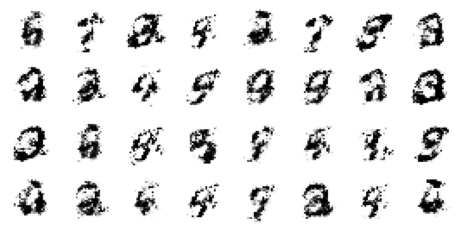

Epoch 2/3


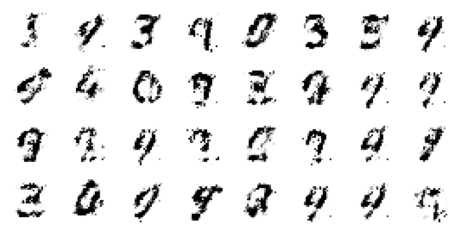

Epoch 3/3


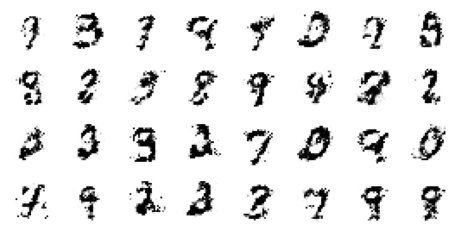

In [17]:
def train_gan(gan, dataset, batch_size, codings_size, n_epochs=3):
    generator, discriminator = gan.layers
    for epoch in range(n_epochs):
        print("Epoch {}/{}".format(epoch + 1, n_epochs)) 
        for X_batch in dataset:
            # phase 1 - training the discriminator
            noise = tf.random.normal(shape=[batch_size, codings_size])
            generated_images = generator(noise)
            X_fake_and_real = tf.concat([generated_images, X_batch], axis=0)
            y1 = tf.constant([[0.]] * batch_size + [[1.]] * batch_size)
            discriminator.trainable = True
            discriminator.train_on_batch(X_fake_and_real, y1)
            # phase 2 - training the generator
            noise = tf.random.normal(shape=[batch_size, codings_size])
            y2 = tf.constant([[1.]] * batch_size)
            discriminator.trainable = False
            gan.train_on_batch(noise, y2)
        plot_multiple_images(generated_images, 8)                     # not shown
        plt.show()  

train_gan(gan, dataset, batch_size, codings_size)

#### Will display images

Code is based on in book tutorial

Images are more defined by using transposing, convolutions and batch normalization

In [18]:
codings_size = 30

generator = keras.models.Sequential([
    keras.layers.Dense(7 * 7 * 128, input_shape=[codings_size]),
    keras.layers.Reshape([7, 7, 128]),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2DTranspose(64, kernel_size=5, strides=2, padding="same",
                                 activation="selu"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2DTranspose(1, kernel_size=5, strides=2, padding="same",
                                 activation="tanh")
])
discriminator = keras.models.Sequential([
    keras.layers.Conv2D(64, kernel_size=5, strides=2, padding="same",
                        activation=keras.layers.LeakyReLU(0.2),
                        input_shape=[28, 28, 1]),
    keras.layers.Dropout(0.4),
    keras.layers.Conv2D(128, kernel_size=5, strides=2, padding="same",
                        activation=keras.layers.LeakyReLU(0.2)),
    keras.layers.Dropout(0.4),
    keras.layers.Flatten(),
    keras.layers.Dense(1, activation="sigmoid")
])
gan = keras.models.Sequential([generator, discriminator])

In [19]:
discriminator.compile(loss="binary_crossentropy", optimizer="rmsprop")
discriminator.trainable = False
gan.compile(loss="binary_crossentropy", optimizer="rmsprop")

In [20]:
[X_train, y_train], [X_test, y_test] = tf.keras.datasets.mnist.load_data()
X_train = X_train / 255
X_test = X_test / 255


In [21]:
X_train = X_train.reshape(-1, 28, 28, 1) * 2. - 1. # reshape and rescale

In [22]:
X_train = tf.cast(X_train, tf.float32)

In [23]:
batch_size = 32
# X_train = tf.cast(X_train, tf.uint32)
dataset = tf.data.Dataset.from_tensor_slices(X_train).shuffle(1000)
# test = tf.cast(dataset, tf.uint32)
dataset = dataset.batch(batch_size, drop_remainder=True).prefetch(1)

Epoch 1/3


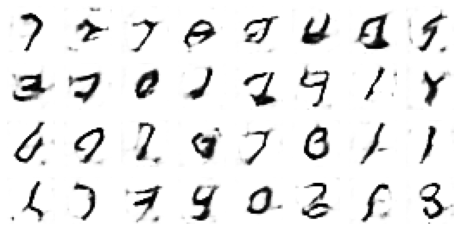

Epoch 2/3


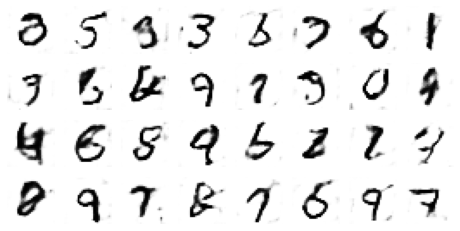

Epoch 3/3


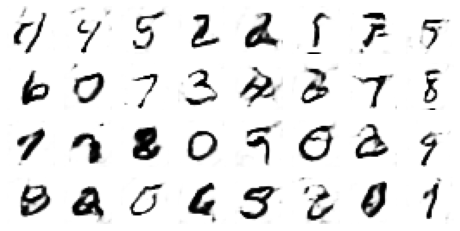

In [24]:
train_gan(gan, dataset, batch_size, codings_size)

### The following is an attempt to get images using a dataset of abstract images

In [25]:
# standard values used
batch_size = 32
img_height = 128
img_width = 128

### Code from an online tutorial, customized for abstract images

#### This is needed in order to load the custom images and split for later

In [26]:
import os
import cv2
def create_dataset(img_folder):
   
    img_data_array=[]
    class_name=[]
   
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
       
            image_path= os.path.join(img_folder, dir1,  file)
            image= cv2.imread( image_path, cv2.COLOR_BGR2RGB)
            image=cv2.resize(image, (img_height, img_width),interpolation = cv2.INTER_AREA)
            image=np.array(image)
            image = image.astype('float32')
            image /= 255 
            img_data_array.append(image)
            class_name.append(dir1)
    return img_data_array, class_name
# extract the image array and class name
X_train_art, class_name =create_dataset('./Abstract_Images/')

In [27]:
data = X_train_art
len(X_train_art)

2782

### Data is loaded as an array but needs to be converted into tensors

In [28]:
X_train_art = tf.convert_to_tensor(X_train_art)
X_train_art

<tf.Tensor: shape=(2782, 128, 128, 3), dtype=float32, numpy=
array([[[[0.63529414, 0.64705884, 0.63529414],
         [0.65882355, 0.654902  , 0.6392157 ],
         [0.67058825, 0.6627451 , 0.6431373 ],
         ...,
         [0.73333335, 0.84705883, 0.8627451 ],
         [0.7254902 , 0.8352941 , 0.84705883],
         [0.78431374, 0.8745098 , 0.8784314 ]],

        [[0.08627451, 0.07450981, 0.03529412],
         [0.07450981, 0.0627451 , 0.03529412],
         [0.0627451 , 0.05882353, 0.04705882],
         ...,
         [0.6627451 , 0.7764706 , 0.7921569 ],
         [0.6627451 , 0.7764706 , 0.78431374],
         [0.7411765 , 0.83137256, 0.8352941 ]],

        [[0.07450981, 0.08627451, 0.03137255],
         [0.05490196, 0.07843138, 0.05490196],
         [0.09411765, 0.13333334, 0.13725491],
         ...,
         [0.6745098 , 0.7882353 , 0.8039216 ],
         [0.65882355, 0.77254903, 0.78431374],
         [0.7411765 , 0.8352941 , 0.8352941 ]],

        ...,

        [[0.63529414, 0.5843137

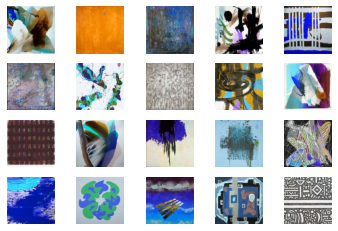

In [29]:
for i in range(20):
    # define subplot
    plt.subplot(4, 5, 1 + i)
    # turn off axis
    plt.axis('off')
    # plot raw pixel data
    plt.imshow(X_train_art[i])
plt.show()

In [30]:
batch_size = 16
X_train_art = tf.reshape(X_train_art, (-1, 128, 128, )) # reshape and rescale
dataset = tf.data.Dataset.from_tensor_slices(X_train_art).shuffle(1000)
dataset = dataset.batch(batch_size, drop_remainder=True).prefetch(1)

In [31]:
len(dataset)

521

In [32]:
dataset

<PrefetchDataset shapes: (16, 128, 128), types: tf.float32>

### Using the same basic generator and discriminator for abstract images

In [33]:
generator = keras.models.Sequential([
    keras.layers.Dense(200, activation="selu", input_shape=[codings_size]),
    keras.layers.Dense(300, activation="selu"),
    keras.layers.Dense(128 * 128, activation="sigmoid"),
    keras.layers.Reshape([128, 128])
])

In [34]:
generator.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 200)               6200      
_________________________________________________________________
dense_9 (Dense)              (None, 300)               60300     
_________________________________________________________________
dense_10 (Dense)             (None, 16384)             4931584   
_________________________________________________________________
reshape_2 (Reshape)          (None, 128, 128)          0         
Total params: 4,998,084
Trainable params: 4,998,084
Non-trainable params: 0
_________________________________________________________________


In [35]:
discriminator = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[128, 128]),
    keras.layers.Dense(300, activation="selu"),
    keras.layers.Dense(200, activation="selu"),
    keras.layers.Dense(1, activation="sigmoid")
])
discriminator.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 16384)             0         
_________________________________________________________________
dense_11 (Dense)             (None, 300)               4915500   
_________________________________________________________________
dense_12 (Dense)             (None, 200)               60200     
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 201       
Total params: 4,975,901
Trainable params: 4,975,901
Non-trainable params: 0
_________________________________________________________________


In [36]:
gan = keras.models.Sequential([generator, discriminator])
discriminator.compile(loss="binary_crossentropy", optimizer="rmsprop")
discriminator.trainable = False
gan.compile(loss="binary_crossentropy", optimizer="rmsprop")

### Using the same training and display function as MNIST
#### however, getting more of 'fuzzy' demo images



Epoch 1/3


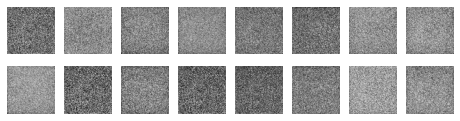

Epoch 2/3


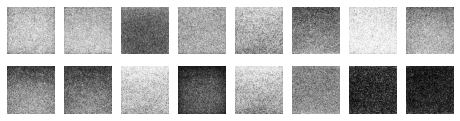

Epoch 3/3


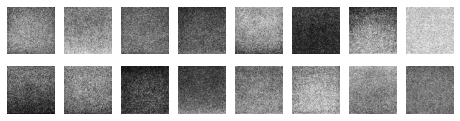

In [37]:
train_gan(gan, dataset, batch_size, codings_size)

In [38]:
# reloading training data using the saved data to prevent long time of reloading
X_train_art = data
X_train_art

[array([[[0.63529414, 0.64705884, 0.63529414],
         [0.65882355, 0.654902  , 0.6392157 ],
         [0.67058825, 0.6627451 , 0.6431373 ],
         ...,
         [0.73333335, 0.84705883, 0.8627451 ],
         [0.7254902 , 0.8352941 , 0.84705883],
         [0.78431374, 0.8745098 , 0.8784314 ]],
 
        [[0.08627451, 0.07450981, 0.03529412],
         [0.07450981, 0.0627451 , 0.03529412],
         [0.0627451 , 0.05882353, 0.04705882],
         ...,
         [0.6627451 , 0.7764706 , 0.7921569 ],
         [0.6627451 , 0.7764706 , 0.78431374],
         [0.7411765 , 0.83137256, 0.8352941 ]],
 
        [[0.07450981, 0.08627451, 0.03137255],
         [0.05490196, 0.07843138, 0.05490196],
         [0.09411765, 0.13333334, 0.13725491],
         ...,
         [0.6745098 , 0.7882353 , 0.8039216 ],
         [0.65882355, 0.77254903, 0.78431374],
         [0.7411765 , 0.8352941 , 0.8352941 ]],
 
        ...,
 
        [[0.63529414, 0.58431375, 0.39215687],
         [0.627451  , 0.60784316, 0.46666

In [39]:
X_train_art = tf.convert_to_tensor(X_train_art) # convert to tensors

In [40]:
batch_size = 12
X_train_art = tf.cast(X_train_art, tf.float32)
X_train_art = tf.reshape(X_train_art, (-1, 128, 128, 1)) # reshape and rescale
dataset = tf.data.Dataset.from_tensor_slices(X_train_art).shuffle(100)
dataset = dataset.batch(batch_size, drop_remainder=True).prefetch(1)

In [41]:
codings_size = 30

generator = keras.models.Sequential([
    keras.layers.Dense(32 * 32 * 128, input_shape=[codings_size]),
    keras.layers.Reshape([32, 32, 128]),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2DTranspose(64, kernel_size=4, strides=2, padding="same",
                                 activation="selu"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2DTranspose(1, kernel_size=4, strides=2, padding="same",
                                 activation="tanh")
])

generator.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 131072)            4063232   
_________________________________________________________________
reshape_3 (Reshape)          (None, 32, 32, 128)       0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 128)       512       
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 64, 64, 64)        131136    
_________________________________________________________________
batch_normalization_3 (Batch (None, 64, 64, 64)        256       
_________________________________________________________________
conv2d_transpose_3 (Conv2DTr (None, 128, 128, 1)       1025      
Total params: 4,196,161
Trainable params: 4,195,777
Non-trainable params: 384
__________________________________________

In [42]:
discriminator = keras.models.Sequential([
    keras.layers.Conv2D(64, kernel_size=4, strides=2, padding="same",
                        activation=keras.layers.LeakyReLU(0.2),
                        input_shape=[128, 128, 1]),
    keras.layers.Dropout(0.4),
    keras.layers.Conv2D(128, kernel_size=4, strides=2, padding="same",
                        activation=keras.layers.LeakyReLU(0.2)),
    keras.layers.Dropout(0.4),
    keras.layers.Flatten(),
    keras.layers.Dense(1, activation="sigmoid")
])
discriminator.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 64, 64, 64)        1088      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 128)       131200    
_________________________________________________________________
dropout_3 (Dropout)          (None, 32, 32, 128)       0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 131072)            0         
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 131073    
Total params: 263,361
Trainable params: 263,361
Non-trainable params: 0
_______________________________________________

In [43]:
gan = keras.models.Sequential([generator, discriminator])

In [44]:
discriminator.compile(loss="binary_crossentropy", optimizer="rmsprop")
discriminator.trainable = False
gan.compile(loss="binary_crossentropy", optimizer="rmsprop")

### Images are displayed but not as expected

NOTE: experimented with changing strides and kernal-size based on tutorials 
but still very unfocused

Epoch 1/3


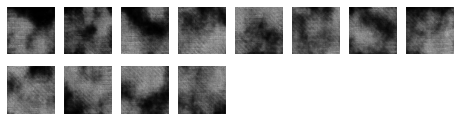

Epoch 2/3


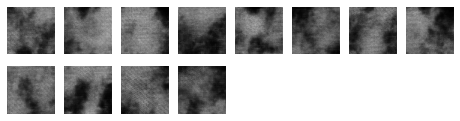

Epoch 3/3


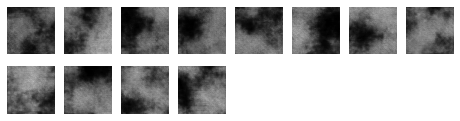

In [45]:
train_gan(gan, dataset, batch_size, codings_size)